In [ ]:
!nvidia-smi

# Part 0: Installing Dependencies Needed

In [2]:
# !sudo apt update
# !sudo apt install colmap -y
# !pip install plyfile imageio tqdm scikit-image matplotlib pybind11

# !apt update -qq
# !apt install -qq colmap
# #!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip uninstall -y torch torchvision torchaudio
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install numpy pillow matplotlib tqdm
!apt update -qq
!apt install -y colmap
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install \
    numpy \
    pillow \
    imageio \
    tqdm \
    matplotlib \
    scikit-image \
    plyfile \
    lpips

48 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core gsettings-desktop-schemas libamd2 libatk-bridge2.0-0
  libatk1.0-0 libatk1.0-data libatspi2.0-0 libcamd2 libccolamd2 libceres2
  libcholmod3 libcolamd2 libcxsparse3 libdouble-conversion3 libevdev2
  libfreeimage3 libgflags2.2 libglew2.2 libgoogle-glog0v5 libgtk-3-0
  libgtk-3-bin libgtk-3-common libgudev-1.0-0 libilmbase25 libinput-bin
  libinput10 libjxr0 libmd4c0 libmetis5 libmtdev1 libopenexr25 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libraw20
  librsvg2-common libspqr2 libsuitesparseconfig5 libwacom-bin libwacom-common
  libwaco

In [3]:
import os
import shutil


# Step 1: Data collection and Preparation


Description: Use multi-view images of static objects or scenes from publicly available datasets. Extract camera intrinsics and extrinsics using Structure-from-Motion (SfM) tools.

<small> Step 1: Upload dataset onto colab. Dataset utilized multiview images of a singular object.

In [4]:
proj = "proj"
img_dir = f"{proj}/data/images"
colmap_dir = f"{proj}/data/colmap"
sparse_out = f"{colmap_dir}/sparse"

shutil.rmtree(proj, ignore_errors=True)
os.makedirs(img_dir, exist_ok=True)
os.makedirs(colmap_dir, exist_ok=True)
from google.colab import files
uploaded = files.upload()

for name, file in uploaded.items():
    open(os.path.join(img_dir, name), "wb").write(file)

print("Finished uploading", len(uploaded), "images.")

Saving 20251213_122603.jpg to 20251213_122603.jpg
Saving 20251213_122409.jpg to 20251213_122409.jpg
Saving 20251213_122414.jpg to 20251213_122414.jpg
Saving 20251213_122416.jpg to 20251213_122416.jpg
Saving 20251213_122437.jpg to 20251213_122437.jpg
Saving 20251213_122443.jpg to 20251213_122443.jpg
Saving 20251213_122447.jpg to 20251213_122447.jpg
Saving 20251213_122450.jpg to 20251213_122450.jpg
Saving 20251213_122455.jpg to 20251213_122455.jpg
Saving 20251213_122457.jpg to 20251213_122457.jpg
Saving 20251213_122500.jpg to 20251213_122500.jpg
Saving 20251213_122504.jpg to 20251213_122504.jpg
Saving 20251213_122511.jpg to 20251213_122511.jpg
Saving 20251213_122515.jpg to 20251213_122515.jpg
Saving 20251213_122544.jpg to 20251213_122544.jpg
Saving 20251213_122546.jpg to 20251213_122546.jpg
Saving 20251213_122548.jpg to 20251213_122548.jpg
Saving 20251213_122549.jpg to 20251213_122549.jpg
Saving 20251213_122559.jpg to 20251213_122559.jpg
Saving 20251213_122601.jpg to 20251213_122601.jpg


<small>Step 2: Verify the images are in the right directory.

In [5]:
#verify the images are in the right directory
import os

img_dir = "proj/data/images"

print("Checking images in:", img_dir)
for root, dirs, files in os.walk(img_dir):
    print(root, dirs, files)

Checking images in: proj/data/images
proj/data/images [] ['20251213_122559.jpg', '20251213_125017.jpg', '20251213_122603.jpg', '20251213_122429.jpg', '20251213_122548.jpg', '20251213_122422.jpg', '20251213_125016.jpg', '20251213_125019.jpg', '20251213_122407.jpg', '20251213_125006.jpg', '20251213_122546.jpg', '20251213_122447.jpg', '20251213_122424.jpg', '20251213_125033.jpg', '20251213_122655.jpg', '20251213_125005.jpg', '20251213_122437.jpg', '20251213_122653.jpg', '20251213_122544.jpg', '20251213_122657.jpg', '20251213_122504.jpg', '20251213_125030.jpg', '20251213_122511.jpg', '20251213_122414.jpg', '20251213_122601.jpg', '20251213_122455.jpg', '20251213_125038.jpg', '20251213_125001.jpg', '20251213_125015.jpg', '20251213_125002.jpg', '20251213_122432.jpg', '20251213_122500.jpg', '20251213_125021.jpg', '20251213_122457.jpg', '20251213_122450.jpg', '20251213_122443.jpg', '20251213_125026.jpg', '20251213_122434.jpg', '20251213_122445.jpg', '20251213_122409.jpg', '20251213_122419.jpg',

<small>Step 3: Run Feature Extraction

In [6]:
!sudo apt update
!sudo apt install colmap xvfb -y
!sudo apt-get update
!sudo apt-get install -y imagemagick


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
48 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as re

In [7]:
img_dir = "proj/data/images"
colmap_dir = "proj/data/colmap"

# auto orient images
!mogrify -auto-orient {img_dir}/*.jpg

!mkdir -p {colmap_dir}
!rm -f {colmap_dir}/database.db

In [8]:
print("Running COLMAP feature_extractor...")

!xvfb-run -a colmap feature_extractor \
    --database_path {colmap_dir}/database.db \
    --image_path {img_dir} \
    --SiftExtraction.use_gpu 0

Running COLMAP feature_extractor...

Feature extraction

Processed file [1/50]
  Name:            20251213_122407.jpg
  Dimensions:      4032 x 3024
  Camera:          #1 - SIMPLE_RADIAL
  Focal Length:    2995.20px (Prior)
  Features:        2171
Processed file [2/50]
  Name:            20251213_122416.jpg
  Dimensions:      4032 x 3024
  Camera:          #1 - SIMPLE_RADIAL
  Focal Length:    2995.20px (Prior)
  Features:        1943
Processed file [3/50]
  Name:            20251213_122414.jpg
  Dimensions:      4032 x 3024
  Camera:          #1 - SIMPLE_RADIAL
  Focal Length:    2995.20px (Prior)
  Features:        2647
Processed file [4/50]
  Name:            20251213_122409.jpg
  Dimensions:      4032 x 3024
  Camera:          #1 - SIMPLE_RADIAL
  Focal Length:    2995.20px (Prior)
  Features:        2803
Processed file [5/50]
  Name:            20251213_122419.jpg
  Dimensions:      4032 x 3024
  Camera:          #1 - SIMPLE_RADIAL
  Focal Length:    2995.20px (Prior)
  Features: 

<small> Step 4: Exhaustive Matching

In [9]:
!colmap exhaustive_matcher \
    --database_path {colmap_dir}/database.db \
    --SiftMatching.use_gpu 0


Exhaustive feature matching

Matching block [1/1, 1/1] in 72.035s
Elapsed time: 1.201 [minutes]


<small> Step 5: Sparse Reconstruction (Mapper)

In [10]:
!mkdir -p {colmap_dir}/sparse

!colmap mapper \
    --database_path {colmap_dir}/database.db \
    --image_path {img_dir} \
    --output_path {colmap_dir}/sparse \
    --Mapper.init_image_id1 1 \
    --Mapper.init_image_id2 2 \
    --Mapper.min_num_matches 8 \
    --Mapper.multiple_models 1

Streaming output truncated to the last 5000 lines.
  => Image sees 57 / 422 points

Pose refinement report
----------------------
    Residuals : 112
   Parameters : 6
   Iterations : 10
         Time : 0.00111294 [s]
 Initial cost : 0.720404 [px]
   Final cost : 0.59301 [px]
  Termination : Convergence

  => Continued observations: 56
  => Added observations: 146

Bundle adjustment report
------------------------
    Residuals : 740
   Parameters : 478
   Iterations : 26
         Time : 0.0231891 [s]
 Initial cost : 0.823648 [px]
   Final cost : 0.402154 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 0
  => Filtered observations: 9
  => Changed observations: 0.024324

Bundle adjustment report
------------------------
    Residuals : 722
   Parameters : 466
   Iterations : 15
         Time : 0.0129192 [s]
 Initial cost : 0.443845 [px]
   Final cost : 0.42327 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed obser

In [11]:
!apt install -y sqlite3


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 48 not upgraded.
Need to get 769 kB of archives.
After this operation, 1,874 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.5 [769 kB]
Fetched 769 kB in 0s (7,793 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 125166 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.5_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.5) ...
Setting up sqlite3 (3.37.2-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


<small>Verify the files are there

In [12]:
!ls proj/data/colmap/sparse
!ls proj/data/colmap/sparse/0

0   11	14  17	2   22	25  28	30  33	36  39	41  44	47  5  8
1   12	15  18	20  23	26  29	31  34	37  4	42  45	48  6  9
10  13	16  19	21  24	27  3	32  35	38  40	43  46	49  7
cameras.bin  images.bin  points3D.bin  project.ini


<small> Step 6: Gather the camera intristics and extrinstics

In [13]:
!ls -R proj/data/colmap


proj/data/colmap:
database.db  sparse

proj/data/colmap/sparse:
0   11	14  17	2   22	25  28	30  33	36  39	41  44	47  5  8
1   12	15  18	20  23	26  29	31  34	37  4	42  45	48  6  9
10  13	16  19	21  24	27  3	32  35	38  40	43  46	49  7

proj/data/colmap/sparse/0:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/1:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/10:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/11:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/12:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/13:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/14:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/15:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/16:
cameras.bin  images.bin  points3D.bin  project.ini

proj/data/colmap/sparse/17:
cameras.bin  images.

In [14]:
INPUT_MODEL="proj/data/colmap/sparse/0"
OUTPUT_MODEL="proj/data/colmap/sparse_text"

!mkdir -p $OUTPUT_MODEL

!colmap model_converter \
    --input_path $INPUT_MODEL \
    --output_path $OUTPUT_MODEL \
    --output_type TXT

In [15]:
!ls proj/data/colmap/sparse_text/

cameras.txt  images.txt  points3D.txt


In [16]:
import struct
import numpy as np

COLMAP_SPARSE = "proj/data/colmap/sparse/0"
def read_cameras_binary(path):
    cameras = {}
    with open(path, "rb") as f:
        num_cameras = struct.unpack("<Q", f.read(8))[0]

        for _ in range(num_cameras):
            cam_id = struct.unpack("<i", f.read(4))[0]
            model_id = struct.unpack("<i", f.read(4))[0]
            width = struct.unpack("<Q", f.read(8))[0]
            height = struct.unpack("<Q", f.read(8))[0]


            if model_id == 0:
                num_params = 3
            elif model_id == 1:
                num_params = 4
            elif model_id == 2:
                num_params = 4
            elif model_id == 3:
                num_params = 5
            else:
                raise ValueError(f"Unsupported camera model {model_id}")

            params = struct.unpack(f"<{num_params}d", f.read(8 * num_params))

            cameras[cam_id] = {
                "model_id": model_id,
                "width": width,
                "height": height,
                "params": np.array(params)
            }
    return cameras
def read_images_binary(path):
    images = {}
    with open(path, "rb") as f:
        num_images = struct.unpack("<Q", f.read(8))[0]

        for _ in range(num_images):
            image_id = struct.unpack("<i", f.read(4))[0]
            qw, qx, qy, qz = struct.unpack("<4d", f.read(32))
            tx, ty, tz = struct.unpack("<3d", f.read(24))
            cam_id = struct.unpack("<i", f.read(4))[0]

            name = b""
            while True:
                c = f.read(1)
                if c == b"\x00":
                    break
                name += c
            name = name.decode("utf-8")

            num_points2D = struct.unpack("<Q", f.read(8))[0]
            f.read(num_points2D * (2 * 8 + 8))  # skip 2D points

            images[image_id] = {
                "qvec": np.array([qw, qx, qy, qz]),
                "tvec": np.array([tx, ty, tz]),
                "camera_id": cam_id,
                "name": name
            }
    return images

def read_points3d_binary(path):
    points3D = {}
    with open(path, "rb") as fid:
        num_points = struct.unpack("<Q", fid.read(8))[0]

        for _ in range(num_points):
            point_id = struct.unpack("<Q", fid.read(8))[0]
            xyz = struct.unpack("<3d", fid.read(24))
            rgb = struct.unpack("<3B", fid.read(3))
            error = struct.unpack("<d", fid.read(8))[0]

            track_length = struct.unpack("<Q", fid.read(8))[0]

            track_elems = []
            for _ in range(track_length):
                image_id = struct.unpack("<i", fid.read(4))[0]
                point2D_idx = struct.unpack("<i", fid.read(4))[0]
                track_elems.append((image_id, point2D_idx))

            points3D[point_id] = {
                "xyz": np.array(xyz, dtype=np.float64),
                "rgb": np.array(rgb, dtype=np.uint8),
                "error": error,
                "track": track_elems
            }
    return points3D

cameras = read_cameras_binary(f"{COLMAP_SPARSE}/cameras.bin")
images = read_images_binary(f"{COLMAP_SPARSE}/images.bin")
points3D = read_points3d_binary(f"{COLMAP_SPARSE}/points3D.bin")

print("Cameras:", len(cameras))
print("Images:", len(images))
print("3D Points:", len(points3D))

Cameras: 1
Images: 36
3D Points: 2117


#Step 2: 3D Gaussian Splat Representation

Description: Represent each 3D point as an anisotropic Gaussian ellipsoid parameterized by position, covariance, color, and opacity. Initialize Gaussians from sparse point clouds generated by SfM.

<small>Step 1: Plot the 3D sparse point cloud from the previous results

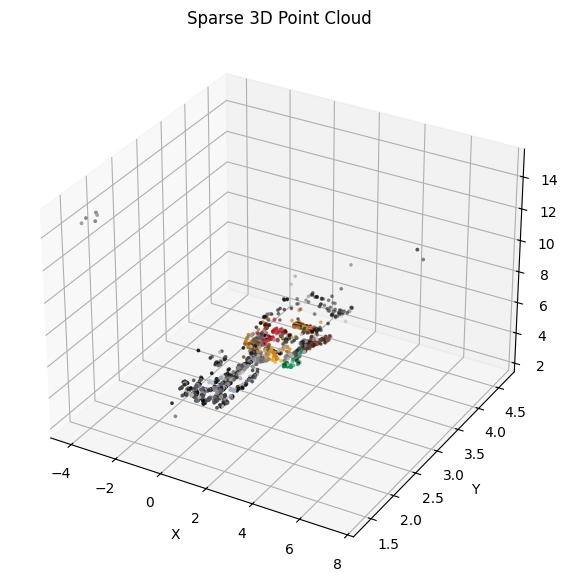

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xyz = []
rgb = []

for pid, p in points3D.items():
    xyz.append(p["xyz"])
    rgb.append(p["rgb"] / 255.0)

xyz = np.array(xyz)
rgb = np.array(rgb)

# Plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=rgb, s=3)
ax.set_title("Sparse 3D Point Cloud")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()


<small>Step 2:  Represent each 3D point as an anisotropic Gaussian ellipsoid parameterized by position, covariance, color, and opacity.

In [18]:
import torch

device = "cuda"
N = xyz.shape[0]

means = torch.tensor(xyz, dtype=torch.float32, device=device) #mean

colors = torch.tensor(rgb, dtype=torch.float32, device=device) #color

log_scales = torch.zeros((N, 3), device=device) #anisotropic scale

rotations = torch.zeros((N, 4), device=device)
rotations[:, 0] = 1.0

opacity = torch.full((N, 1), 0.1, device=device) #opacity

num_show = 5

#only print results for first 5 points, because there are too many points to print the results of
for i in range(num_show):
    print(f"Gaussian {i}")
    print("  Mean (xyz):", means[i].cpu().numpy())
    print("  Log-Scales:", log_scales[i].cpu().numpy())
    print("  Scales (σ):", torch.exp(log_scales[i]).cpu().numpy())
    print("  Rotation (quat):", rotations[i].cpu().numpy())
    print("  Opacity:", opacity[i].item())
    print("  Color (RGB):", colors[i].cpu().numpy())
    print()


Gaussian 0
  Mean (xyz): [0.2938866 1.4561223 6.1654515]
  Log-Scales: [0. 0. 0.]
  Scales (σ): [1. 1. 1.]
  Rotation (quat): [1. 0. 0. 0.]
  Opacity: 0.10000000149011612
  Color (RGB): [0.32156864 0.2901961  0.28235295]

Gaussian 1
  Mean (xyz): [1.8687868 2.9039452 5.2715163]
  Log-Scales: [0. 0. 0.]
  Scales (σ): [1. 1. 1.]
  Rotation (quat): [1. 0. 0. 0.]
  Opacity: 0.10000000149011612
  Color (RGB): [0.6431373  0.42352942 0.18431373]

Gaussian 2
  Mean (xyz): [1.2061099 4.2842875 4.5917263]
  Log-Scales: [0. 0. 0.]
  Scales (σ): [1. 1. 1.]
  Rotation (quat): [1. 0. 0. 0.]
  Opacity: 0.10000000149011612
  Color (RGB): [0.30980393 0.3019608  0.3137255 ]

Gaussian 3
  Mean (xyz): [0.995495  2.1368496 5.3285623]
  Log-Scales: [0. 0. 0.]
  Scales (σ): [1. 1. 1.]
  Rotation (quat): [1. 0. 0. 0.]
  Opacity: 0.10000000149011612
  Color (RGB): [0.09803922 0.10196079 0.10588235]

Gaussian 4
  Mean (xyz): [2.056788  4.2827897 4.583268 ]
  Log-Scales: [0. 0. 0.]
  Scales (σ): [1. 1. 1.]
  Rot

#3. Rendering and Optimization

Description: Implement differentiable rasterization of Gaussians to render novel views. Optimize Gaussian parameters using gradient descent to minimize the photometric error between rendered and ground-truth images.

<small>Step 1: Project Gaussians into a Camera

In [19]:
def qvec_to_rotmat(qvec):
    """
    Convert COLMAP quaternion (qw, qx, qy, qz) to rotation matrix.
    """
    qw, qx, qy, qz = qvec

    return np.array([
        [1 - 2*qy*qy - 2*qz*qz, 2*qx*qy - 2*qz*qw,     2*qx*qz + 2*qy*qw],
        [2*qx*qy + 2*qz*qw,     1 - 2*qx*qx - 2*qz*qz, 2*qy*qz - 2*qx*qw],
        [2*qx*qz - 2*qy*qw,     2*qy*qz + 2*qx*qw,     1 - 2*qx*qx - 2*qy*qy]
    ], dtype=np.float32)

img_data = list(images.values())[0]
R = torch.tensor(qvec_to_rotmat(img_data["qvec"]),
                 dtype=torch.float32, device="cuda")
t = torch.tensor(img_data["tvec"],
                 dtype=torch.float32, device="cuda").view(3, 1)

# Intrinsics
cam = list(cameras.values())[0]
fx, fy, cx, cy = cam["params"]
K = torch.tensor([
    [fx, 0,  cx],
    [0,  fy, cy],
    [0,  0,  1]
], dtype=torch.float32, device="cuda")

# World → camera
pts_cam = (R @ means.T + t).T  # (N, 3)

# Keep points in front of camera
mask = pts_cam[:, 2] > 0
pts_cam = pts_cam[mask]
colors_cam = colors[mask]
opacity_cam = opacity[mask]

# Camera → image
pts_img = (K @ pts_cam.T).T
pts_img = pts_img[:, :2] / pts_img[:, 2:3]  # (u, v)


print("Total points before mask:", means.shape[0])
print("Points in front of camera:", pts_cam.shape[0])


Total points before mask: 2117
Points in front of camera: 2117


<small> Step 2: Simple Gaussian Splatting

Using image size: 4032 3024
u range: 1069.376708984375 3438.566162109375
v range: 1197.3668212890625 2509.82666015625
Image size (W, H): 4032 3024


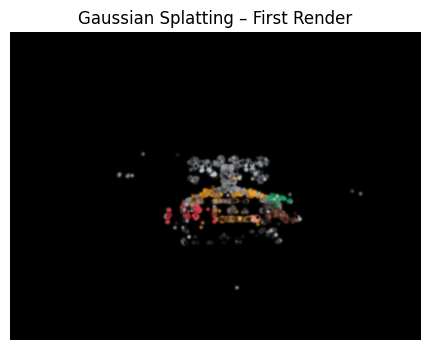

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image to get TRUE size
img_path = f"proj/data/images/{img_data['name']}"
img = Image.open(img_path)

W, H = img.size  # IMPORTANT: trust the image
print("Using image size:", W, H)

K = K.clone()
K[0,2] = W / 2
K[1,2] = H / 2

# Recompute pts_img using updated K
pts_cam = (R @ means.T + t).T
mask = pts_cam[:, 2] > 0
pts_cam = pts_cam[mask]
colors_cam = colors[mask]
opacity_cam = opacity[mask]

pts_img = (K @ pts_cam.T).T
pts_img = pts_img[:, :2] / pts_img[:, 2:3]

# Create render buffers
image = torch.zeros((H, W, 3), device="cuda")
alpha = torch.zeros((H, W), device="cuda")

# Precompute meshgrid ONCE
y = torch.arange(H, device="cuda")
x = torch.arange(W, device="cuda")
yy, xx = torch.meshgrid(y, x, indexing="ij")

sigma = 12.0          # large so we see blobs
opacity_cam[:] = 1.0 # temporary

for i in range(pts_img.shape[0]):
    u, v = pts_img[i]
    c = colors_cam[i]
    a = opacity_cam[i]

    g = torch.exp(-((xx - u)**2 + (yy - v)**2) / (2 * sigma**2))

    image += (1 - alpha[..., None]) * (a * g[..., None] * c)
    alpha += (1 - alpha) * (a * g)

rendered = image.clamp(0, 1).detach().cpu().numpy()

print("u range:", pts_img[:, 0].min().item(), pts_img[:, 0].max().item())
print("v range:", pts_img[:, 1].min().item(), pts_img[:, 1].max().item())
print("Image size (W, H):", W, H)

plt.figure(figsize=(6, 4))
plt.imshow(rendered)
plt.title("Gaussian Splatting – First Render")
plt.axis("off")
plt.show()

<small> Step 3: Depth Sorting

In [22]:
depth = pts_cam[:, 2]
sort_idx = torch.argsort(depth, descending=True)

pts_img = pts_img[sort_idx]
colors_cam = colors_cam[sort_idx]
opacity_cam = opacity_cam[sort_idx]

<small> Step 4: Load the Ground Truth Image and get the Photometric Loss

In [23]:
gt = torch.tensor(
    np.array(img) / 255.0,
    dtype=torch.float32,
    device="cuda"
)

loss = torch.mean((image - gt)**2)

<small> Step 5: Optimize the Parameters

In [24]:
means.requires_grad_(True)
colors.requires_grad_(True)
opacity.requires_grad_(True)

tensor([[0.1000],
        [0.1000],
        [0.1000],
        ...,
        [0.1000],
        [0.1000],
        [0.1000]], device='cuda:0', requires_grad=True)

In [25]:
import torch.nn as nn

colors = nn.Parameter(torch.tensor(rgb, dtype=torch.float32, device="cuda"))
opacity = nn.Parameter(torch.full((len(colors),), 0.5, device="cuda"))

optimizer = torch.optim.Adam([colors, opacity], lr=1e-2)

radius = int(3 * sigma)

for it in range(200):
    optimizer.zero_grad()

    # --- FORWARD PASS ---
    image = torch.zeros((H, W, 3), device="cuda")
    alpha = torch.zeros((H, W), device="cuda")

    # Project
    pts_cam = (R @ means.T + t).T
    mask = pts_cam[:, 2] > 0

    pts_cam = pts_cam[mask]
    pts_img = (K @ pts_cam.T).T
    pts_img = pts_img[:, :2] / pts_img[:, 2:3]

    colors_cam = colors[mask]
    opacity_cam = opacity[mask]

    # Depth sort
    depth = pts_cam[:, 2]
    idx = torch.argsort(depth, descending=True)

    pts_img = pts_img[idx]
    colors_cam = colors_cam[idx]
    opacity_cam = opacity_cam[idx]

    # --- GAUSSIAN SPLATTING ---
    for i in range(pts_img.shape[0]):
        u, v = pts_img[i]
        c = colors_cam[i]
        a = opacity_cam[i]

        ui = int(u.item())
        vi = int(v.item())

        x0 = max(ui - radius, 0)
        x1 = min(ui + radius + 1, W)
        y0 = max(vi - radius, 0)
        y1 = min(vi + radius + 1, H)

        if x0 >= x1 or y0 >= y1:
            continue

        xs = torch.arange(x0, x1, device="cuda")
        ys = torch.arange(y0, y1, device="cuda")
        yy, xx = torch.meshgrid(ys, xs, indexing="ij")

        g = torch.exp(-((xx - u)**2 + (yy - v)**2) / (2 * sigma**2))

        image[y0:y1, x0:x1] += (
            (1 - alpha[y0:y1, x0:x1][..., None])
            * (a * g[..., None] * c)
        )

        alpha[y0:y1, x0:x1] += (1 - alpha[y0:y1, x0:x1]) * (a * g)

    # --- LOSS (ONCE!) ---
    loss = torch.mean((image - gt) ** 2)

    # --- BACKPROP (ONCE!) ---
    loss.backward()
    optimizer.step()

    if it % 20 == 0:
        print(f"Iter {it}, Loss {loss.item():.6f}")


Iter 0, Loss 0.439078
Iter 20, Loss 0.435443
Iter 40, Loss 0.433517
Iter 60, Loss 0.432464
Iter 80, Loss 0.431943
Iter 100, Loss 0.431679
Iter 120, Loss 0.431506
Iter 140, Loss 0.431375
Iter 160, Loss 0.431269
Iter 180, Loss 0.431180


Final Gaussian Rendering

In [26]:
import torch
import matplotlib.pyplot as plt

K = K.clone()  # avoid in-place modification
K[0, 2] = W / 2  # principal point x
K[1, 2] = H / 2  # principal point y

@torch.no_grad()
def render_gaussians(
    means, colors, opacity,
    R, t, K,
    H, W,
    sigma
):
    image = torch.zeros((H, W, 3), device="cuda")
    alpha = torch.zeros((H, W), device="cuda")

    # Project
    pts_cam = (R @ means.T + t).T
    mask = pts_cam[:, 2] > 0
    pts_cam = pts_cam[mask]

    pts_img = (K @ pts_cam.T).T
    pts_img = pts_img[:, :2] / pts_img[:, 2:3]

    colors_cam = colors[mask]
    opacity_cam = opacity[mask]

    # Depth sort (back-to-front)
    depth = pts_cam[:, 2]
    idx = torch.argsort(depth, descending=True)

    pts_img = pts_img[idx]
    colors_cam = colors_cam[idx]
    opacity_cam = opacity_cam[idx]

    radius = int(3 * sigma)

    for i in range(pts_img.shape[0]):
        u, v = pts_img[i]
        c = colors_cam[i]
        a = opacity_cam[i]

        ui = int(u.item())
        vi = int(v.item())

        x0 = max(ui - radius, 0)
        x1 = min(ui + radius + 1, W)
        y0 = max(vi - radius, 0)
        y1 = min(vi + radius + 1, H)

        if x0 >= x1 or y0 >= y1:
            continue

        xs = torch.arange(x0, x1, device="cuda")
        ys = torch.arange(y0, y1, device="cuda")
        yy, xx = torch.meshgrid(ys, xs, indexing="ij")

        g = torch.exp(-((xx - u)**2 + (yy - v)**2) / (2 * sigma**2))

        image[y0:y1, x0:x1] += (
            (1 - alpha[y0:y1, x0:x1][..., None])
            * (a * g[..., None] * c)
        )

        alpha[y0:y1, x0:x1] += (1 - alpha[y0:y1, x0:x1]) * (a * g)

    return image.clamp(0, 1)

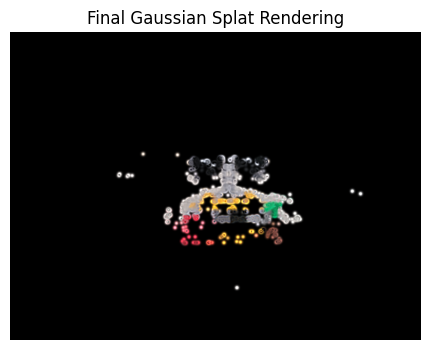

In [27]:
final_image = render_gaussians(
    means=means,
    colors=colors,
    opacity=opacity,
    R=R,
    t=t,
    K=K,
    H=H,
    W=W,
    sigma=sigma
)

plt.figure(figsize=(6,4))
plt.imshow(final_image.cpu().numpy())
plt.title("Final Gaussian Splat Rendering")
plt.axis("off")
plt.show()

#Step 4: Evaluation

Description: Compare rendered novel views to ground-truth images using metrics such as PSNR, SSIM, and LPIPS. Benchmark the rendering speed and quality against NeRF-based methods.

In [29]:
### GROUND TRUTH

from PIL import Image
import torch

gt_path = "proj/data/images/20251213_122407.jpg"  # path to ground-truth image
gt_img_pil = Image.open(gt_path).convert("RGB")  # ensure 3 channels

# Resize to match your rendered image size if necessary
gt_img_pil = gt_img_pil.resize((rendered.shape[1], rendered.shape[0]))

# Convert to torch tensor in [0,1]
gt_img = torch.from_numpy(np.array(gt_img_pil)).float() / 255.0  # [H,W,3]
gt_img = gt_img.to(rendered.device)


<small> Step 1: PSNR

In [41]:
# Ensure rendered is a torch tensor
import torch
import numpy as np

if isinstance(final_image, np.ndarray):
    rendered = torch.from_numpy(final_image).float().to(gt_img.device)

def psnr(rendered, gt_img, eps=1e-8):
    mse = torch.mean((rendered - gt_img) ** 2)
    psnr_val = -10.0 * torch.log10(mse + eps)
    return psnr_val.item()

psnr_val = psnr(rendered, gt_img)
print(f"PSNR: {psnr_val:.2f} dB")


PSNR: 3.59 dB


<small> Step 2: SSIM

In [36]:
!pip install torchmetrics

import torch
from torchmetrics.functional import structural_similarity_index_measure as ssim

# Ensure rendered is a torch tensor
if isinstance(rendered, np.ndarray):
    rendered = torch.from_numpy(rendered).float().to(gt_img.device)

# torchmetrics expects [N,C,H,W], so permute and add batch
rendered_t = rendered.permute(2,0,1).unsqueeze(0)  # [1,3,H,W]
gt_t = gt_img.permute(2,0,1).unsqueeze(0)          # [1,3,H,W]

ssim_val = ssim(rendered_t, gt_t)
print(f"SSIM: {ssim_val:.4f}")


SSIM: 0.0188


<small> Step 3: PSNR

In [37]:
!pip install lpips  # run once

import torch
import lpips

# Initialize LPIPS model (alex by default)
loss_fn = lpips.LPIPS(net='alex').to(rendered.device)

# LPIPS expects [-1,1] range
rendered_lpips = 2 * rendered - 1
gt_lpips = 2 * gt_img - 1

# Add batch dimension [1,3,H,W]
rendered_lpips = rendered_lpips.permute(2,0,1).unsqueeze(0)
gt_lpips = gt_lpips.permute(2,0,1).unsqueeze(0)

lpips_val = loss_fn(rendered_lpips, gt_lpips)
print(f"LPIPS: {lpips_val.item():.4f}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 159MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS: 0.8670
